<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/response_quality/relevance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>

<h1 style="text-align: center;">Evaluating Response Relevance</h1>

**What is Response Relevance?**: Response relevance is the measure of how relevant the generated response is to the question asked. It is a measure of how well the response addresses the question asked and if it contains any additional information that is not relevant to the question asked.

For example, if the question asked is "Can you tell me about the benefits of renewable energy?", a relevant response would be "Renewable energy is energy that is collected from renewable resources, which are naturally replenished on a human timescale, such as sunlight, wind, rain, tides, waves, and geothermal heat." An irrelevant response could be "The concept of electricity dates back to ancient times when people observed static electricity from rubbing certain materials together. It's fascinating how electricity has evolved over the centuries, leading to the development of various technologies."

**Data schema**: The data schema required for this evaluation is as follows:

| Column Name | Description |
| ----------- | ----------- |
| question | The question asked by the user |
| response | The response generated by the model |

 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
#!pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
good_data = [
    {
        "question": "What are the primary components of a cell?",
        "response": "A cell typically consists of a cell membrane, cytoplasm, and a nucleus. The cell membrane encloses the cell and regulates the passage of substances in and out. The cytoplasm contains organelles and other cellular structures, while the nucleus houses the genetic material."
    },
    {
        "question": "How does photosynthesis work?",
        "response": "Photosynthesis is the process by which plants, algae, and some bacteria convert light energy into chemical energy. It involves the absorption of sunlight by chlorophyll, which is used to synthesize glucose from carbon dioxide and water. Oxygen is released as a byproduct."
    },
    {
        "question": "What are the key features of the Python programming language?",
        "response": "Python is a high-level, interpreted programming language known for its readability and simplicity. It supports object-oriented, imperative, and functional programming paradigms. Python has a large standard library, dynamic typing, and automatic memory management."
    },
    {
        "question": "Explain the theory of relativity.",
        "response": "The theory of relativity, developed by Albert Einstein, consists of two major parts: special relativity and general relativity. Special relativity deals with objects moving at constant speeds, particularly those moving close to the speed of light. General relativity extends the theory to include gravity, describing it as the curvature of spacetime caused by mass and energy."
    },
    {
        "question": "What are the benefits of regular exercise?",
        "response": "Regular exercise offers numerous health benefits, including improved cardiovascular health, increased muscle strength, and better weight management. It also enhances mood, reduces the risk of chronic diseases such as diabetes, and promotes overall well-being."
    }
]

bad_data = [
    {
        "question": "What are the primary components of a cell?",
        "response": "The primary components of a cell are crucial for its function. Speaking of components, the integration of software components in modern applications is a key challenge for developers. It requires careful consideration of architectural patterns and design principles."
    },
    {
        "question": "How does photosynthesis work?",
        "response": "Photosynthesis is a fascinating process in biology. By the way, the implementation of photosynthesis algorithms in computer science for optimizing energy consumption in algorithms is an intriguing area of research. It involves mathematical modeling and algorithmic efficiency."
    },
    {
        "question": "What are the key features of the Python programming language?",
        "response": "Python, as a programming language, is known for its simplicity and readability. Speaking of readability, the importance of clear and concise technical documentation in software development cannot be overstated. It enhances collaboration among team members and ensures the maintainability of codebases over time."
    },
    {
        "question": "Explain the theory of relativity.",
        "response": "The theory of relativity is a cornerstone in physics. Interestingly, the theory of relativity has implications not only in physics but also in the field of project management. Time dilation, as described in the theory, is metaphorically analogous to project timelines, where careful planning and execution are crucial for success."
    },
    {
        "question": "What are the benefits of regular exercise?",
        "response": "Regular exercise has well-documented health benefits. On a related note, the importance of routine health check-ups in preventive healthcare cannot be emphasized enough. It allows for early detection of potential health issues and facilitates proactive management for individuals."
    }
]

data = good_data + bad_data

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, Evals
import json

OPENAI_API_KEY = "sk-****************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [Evals.RESPONSE_RELEVANCE]
)

2024-01-31 23:38:38.345 | INFO     | uptrain.framework.evalllm:evaluate:104 - Sending evaluation request for rows 0 to <50 to the Uptrain


In [4]:
print(json.dumps(res, indent=3))

[
   {
      "question": "What are the primary components of a cell?",
      "response": "A cell typically consists of a cell membrane, cytoplasm, and a nucleus. The cell membrane encloses the cell and regulates the passage of substances in and out. The cytoplasm contains organelles and other cellular structures, while the nucleus houses the genetic material.",
      "score_response_relevance": 0.6666666666666666,
      "explanation_response_relevance": " \"The LLM response contains no additional irrelevant information because it accurately and concisely lists the primary components of a cell, including the cell membrane, cytoplasm, and nucleus, without delving into unnecessary details about their functions. The response directly addresses the user query without any additional irrelevant information.\" \n\n \"The LLM response answers a few aspects of the user query by mentioning the cell membrane, cytoplasm, and nucleus as components of a cell. However, it fails to provide further deta

## Step 4: Let's look at some of the results 

### Sample with relevant responses

In [5]:
print(json.dumps(res[0],indent=3))

{
   "question": "What are the primary components of a cell?",
   "response": "A cell typically consists of a cell membrane, cytoplasm, and a nucleus. The cell membrane encloses the cell and regulates the passage of substances in and out. The cytoplasm contains organelles and other cellular structures, while the nucleus houses the genetic material.",
   "score_response_relevance": 0.6666666666666666,
   "explanation_response_relevance": " \"The LLM response contains no additional irrelevant information because it accurately and concisely lists the primary components of a cell, including the cell membrane, cytoplasm, and nucleus, without delving into unnecessary details about their functions. The response directly addresses the user query without any additional irrelevant information.\" \n\n \"The LLM response answers a few aspects of the user query by mentioning the cell membrane, cytoplasm, and nucleus as components of a cell. However, it fails to provide further details about the fun

### Sample with irrelevant responses

In [6]:
print(json.dumps(res[5],indent=3))

{
   "question": "What are the primary components of a cell?",
   "response": "The primary components of a cell are crucial for its function. Speaking of components, the integration of software components in modern applications is a key challenge for developers. It requires careful consideration of architectural patterns and design principles.",
   "score_response_relevance": 0.0,
   "explanation_response_relevance": " \"The LLM response contains a lot of additional irrelevant information because it goes off on a tangent about software components and architectural patterns, which are not related to the user query about the primary components of a cell. This additional information is not needed to answer the user's question and adds unnecessary complexity to the response.\"\n\n \"The given LLM response completely ignores the user query about the primary components of a cell. Instead, it talks about the integration of software components in modern applications, which is completely unrela

## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [7]:
from uptrain import APIClient, Evals
import json

UPTRAIN_API_KEY = "up-**************"  # Insert your UpTrain key here

uptrain_client = APIClient(uptrain_api_key=UPTRAIN_API_KEY)

res = uptrain_client.log_and_evaluate(
    "Sample-relevance-evals",
    data = data,
    checks = [Evals.RESPONSE_RELEVANCE]
)

2024-01-31 23:40:06.748 | INFO     | uptrain.framework.remote:log_and_evaluate:511 - Sending evaluation request for rows 0 to <50 to the Uptrain server


In [8]:
print(json.dumps(res, indent=3))

[
   {
      "question": "What are the primary components of a cell?",
      "response": "A cell typically consists of a cell membrane, cytoplasm, and a nucleus. The cell membrane encloses the cell and regulates the passage of substances in and out. The cytoplasm contains organelles and other cellular structures, while the nucleus houses the genetic material.",
      "score_response_relevance": 1.0,
      "explanation_response_relevance": " \"The LLM response contains no additional irrelevant information because it directly addresses the user query about the primary components of a cell by listing the cell membrane, cytoplasm, and nucleus. The brief explanations of the functions of these components are necessary to provide a complete understanding of the primary components of a cell, and therefore, do not constitute additional irrelevant information.\"\n\n \"The LLM response sufficiently answers all the key aspects of the user query by clearly stating the primary components of a cell, 

### Dashboards: 
Histogram of score vs number of cases with that score

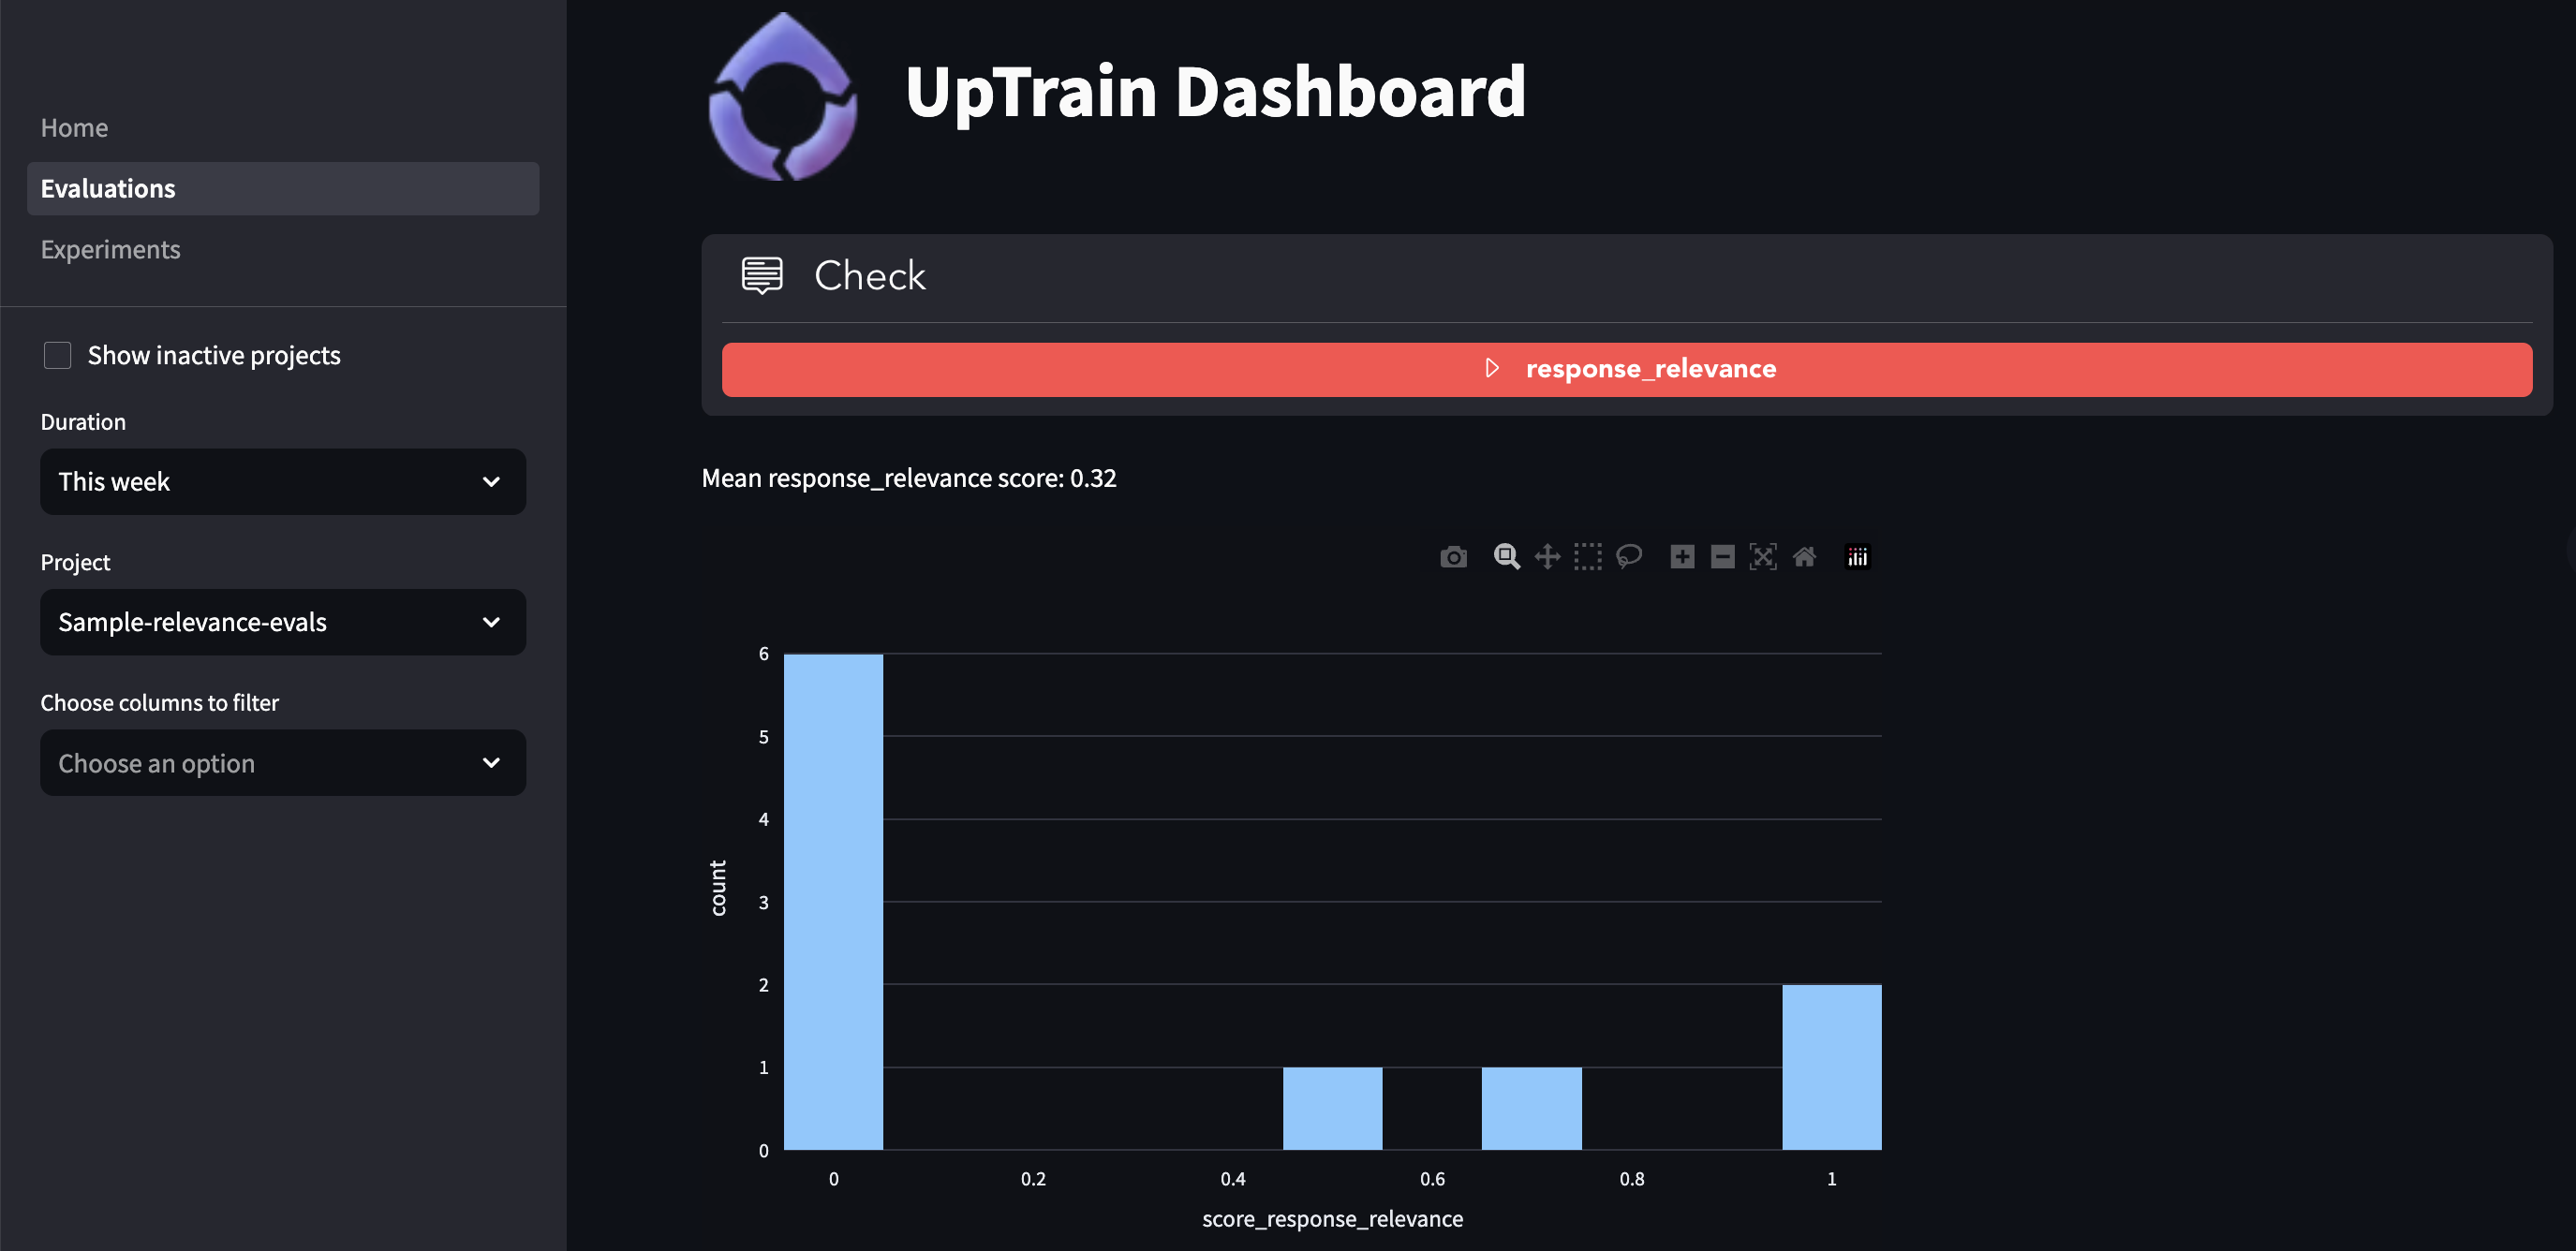

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

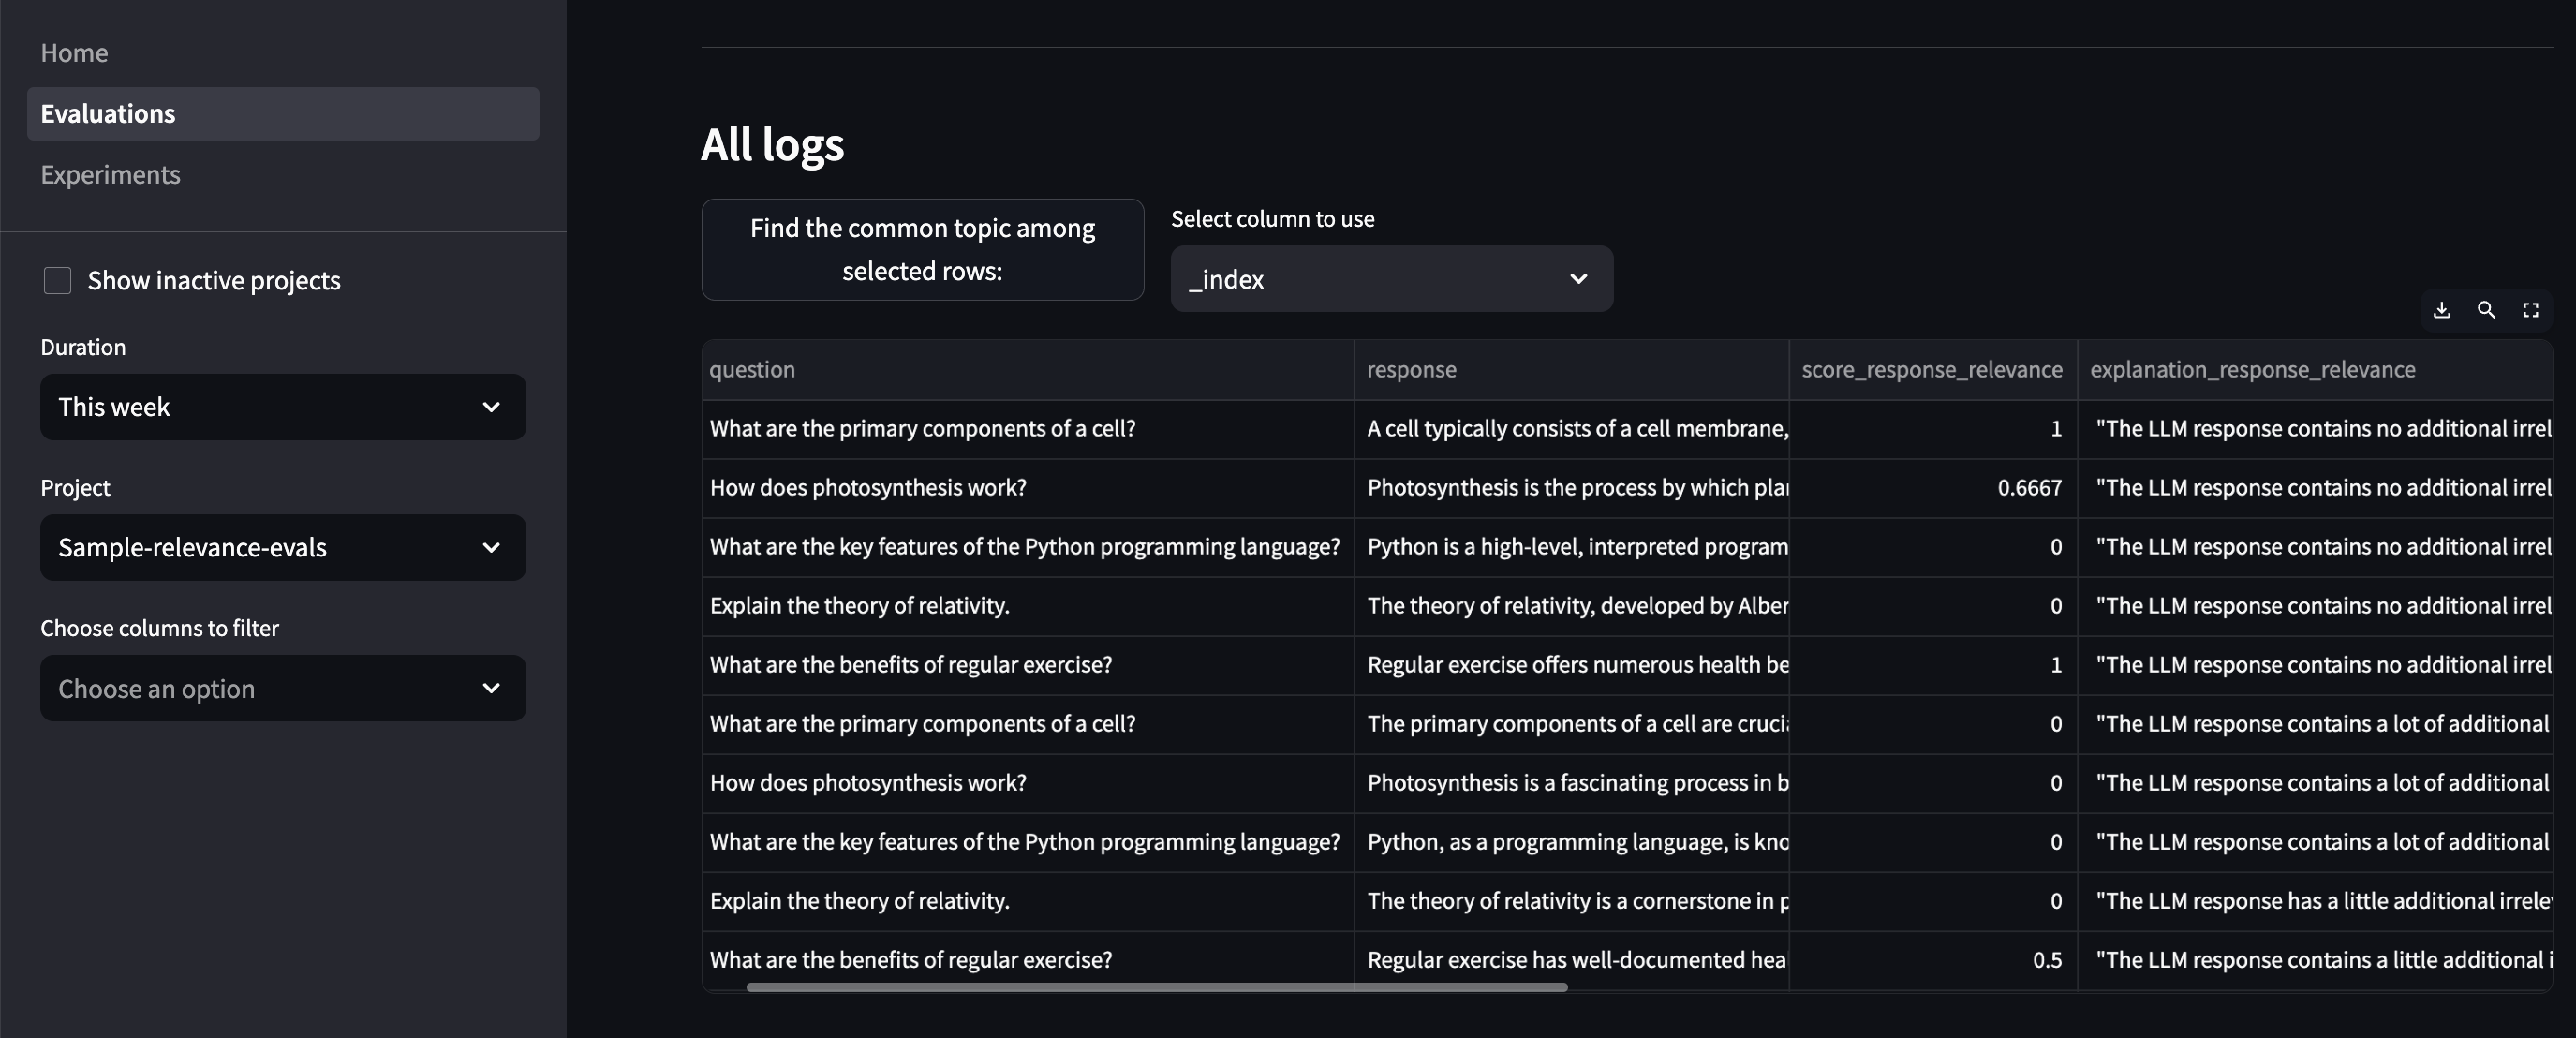